## Модели классификации для нескольких классов

Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов классификации.

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width). Требуется на основе этого набора данных, построить различные модели многоклассовой классификации, оценивающие каждый из трех видов растения по данным проведенных измерений.

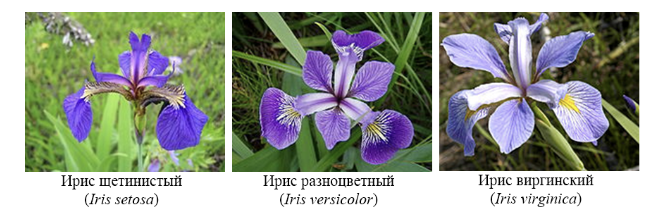

Импортируем необходимые библиотеки:

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Библиотека Scikit-Learn предоставляет чистые датасеты, которые вы можете использовать при построении моделей машинного обучения. Они поставляются вместе с Scikit-Learn (https://scikit-learn.ru/7-1-toy-datasets/).

Набор данных Iris, классический набор данных в машинном обучении и статистике. Он входит в модуль datasets библиотеки scikit-learn и загрузить его можно, вызвав функцию load_iris().

In [221]:
from sklearn.datasets import load_iris
iris = load_iris()

In [222]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [223]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [224]:
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [225]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.

Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica. 

Соответственно, наша задача — по имеющимся данным попробовать найти зависимости между размерами лепестков и сортами Ирисов.

In [226]:
type(iris) 

sklearn.utils._bunch.Bunch

Объект Bunch — это словарь, который предоставляет свои ключи как атрибуты.

Формируем DataFrame:

In [227]:
iris_df = pd.DataFrame(iris.data)

In [228]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [229]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [230]:
iris_df.shape

(150, 6)

In [231]:
# информация о наборе данных
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [232]:
# информация о наборе данных
iris_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [233]:
iris_df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [234]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [235]:
iris_df['name'].value_counts()

name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Описательная статистика

In [236]:
iris_df.hist(figsize = (15,10), bins = 50);

In [237]:
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

Видно, что «petal width (cm)» и «petal length (cm)» имеют сильную зависимость — точки вытянуты вдоль одной линии. И в принципе по этим же признакам можно строить классификацию, т.к. точки по цвету сгруппированы достаточно компактно. А вот, например, с помощью переменных «sepal width (cm)» и «sepal length (cm)» качественную классификацию не построить, т.к. точки, относящиеся к сортам Versicolor и Virginica, перемешаны между собой.

In [238]:
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="sepal width (cm)", hue="name")

<Axes: xlabel='petal width (cm)', ylabel='Density'>

In [239]:
corr = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [240]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

<Axes: >

Действительно видим, что между переменными «petal length (cm)» и «petal width (cm)» выявлена очень сильная зависимость 0.96, а между «sepal width (cm)» и «sepal length (cm)» - слабая корреляция.

### Обучение классификатора

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
                                                      iris_df['target'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [243]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [244]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [245]:
# Другой способ для вычисления метрики
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



### Confusion Matrix

In [247]:
from sklearn.metrics import confusion_matrix

In [248]:
conf_matrix = confusion_matrix(y_test, y_pred)

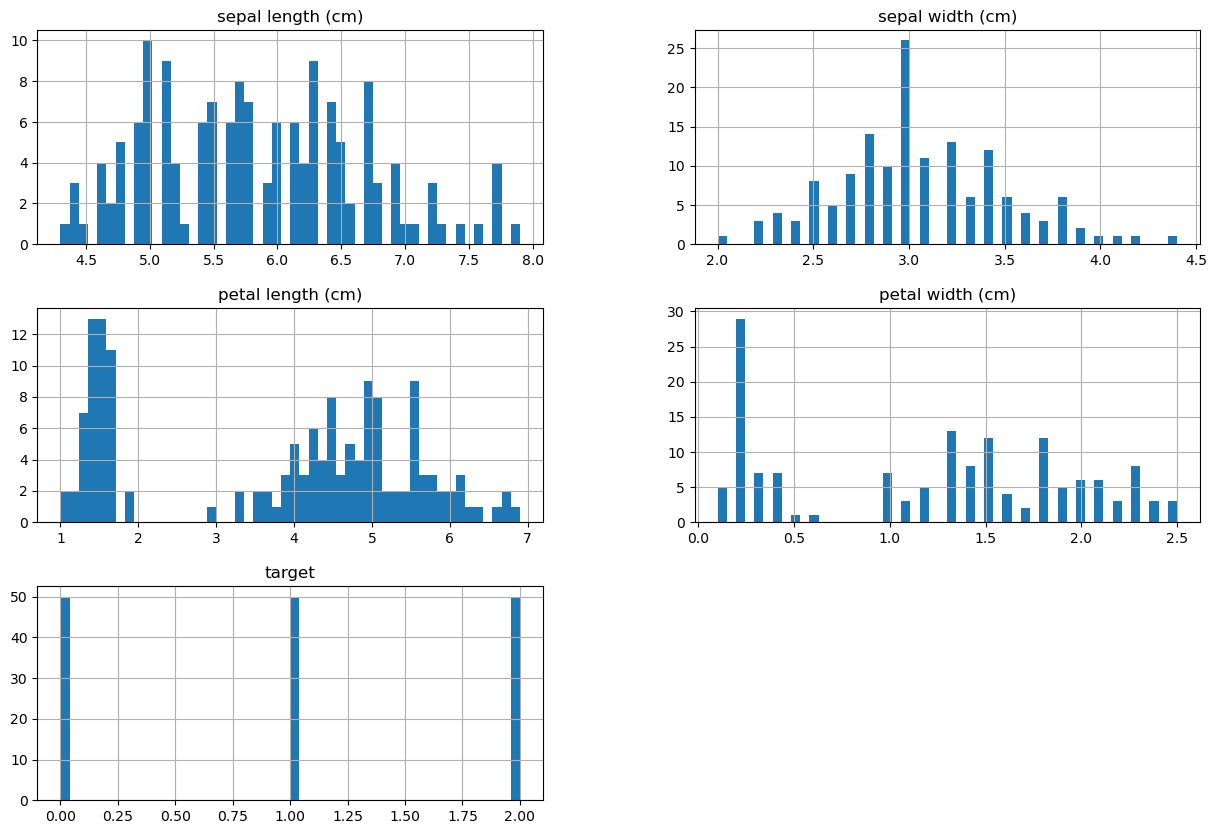

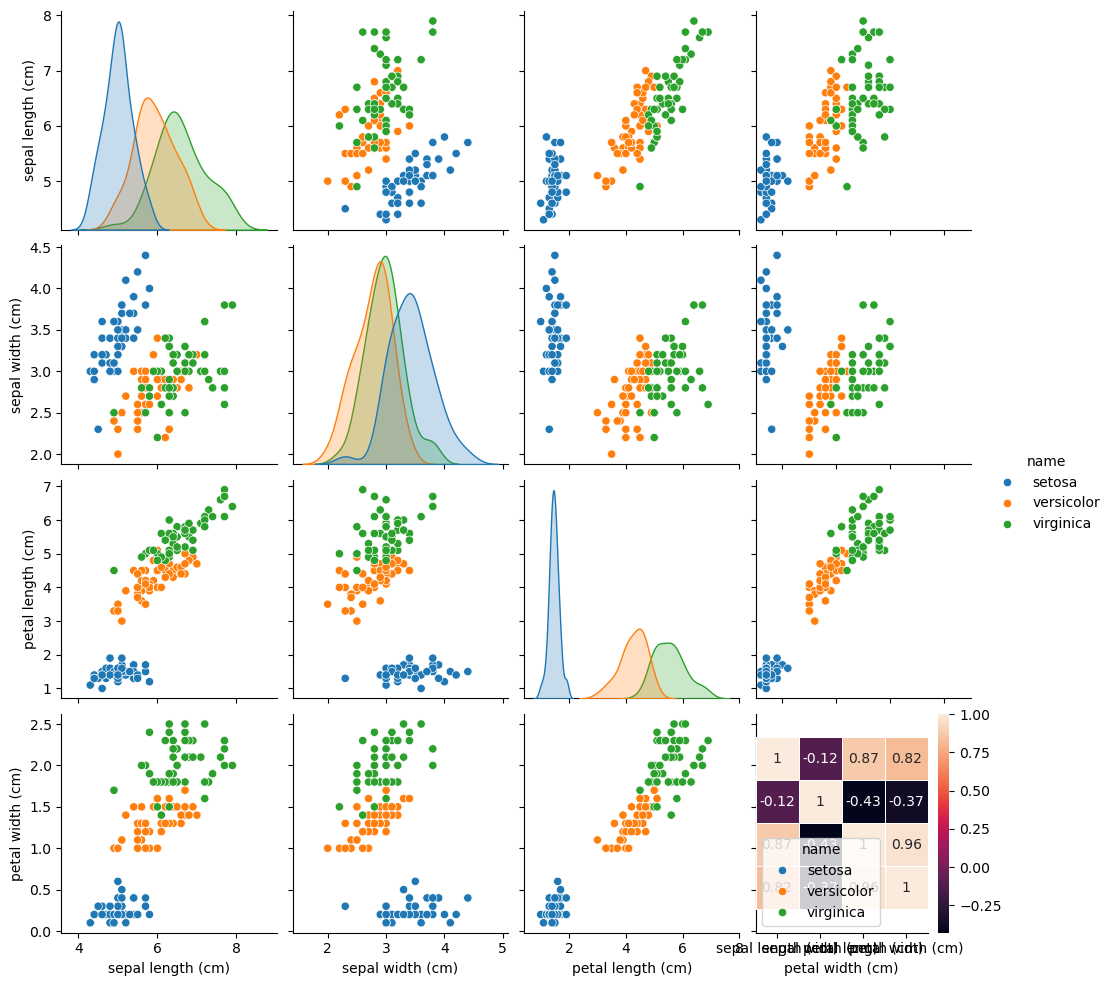

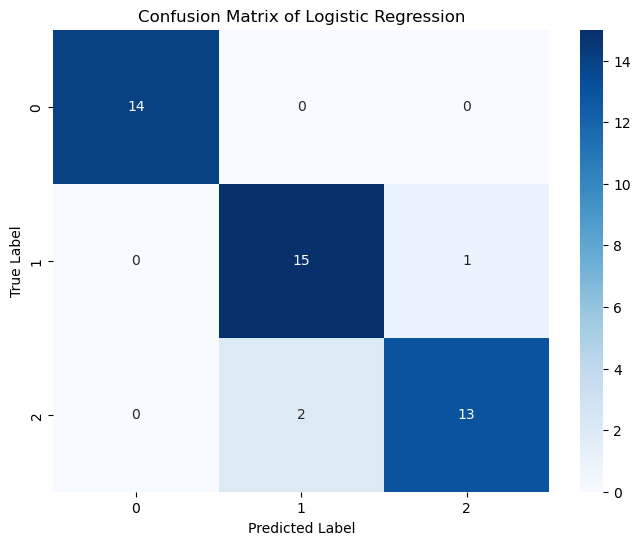

In [249]:
Y = iris_df['target']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### Метрики многоклассовой классификации

1) Микро-усреднение (micro-averaging) является эквивалентом accuracy и подходит __при сбалансированных классах__. Элементы consufion matrix усредняются между бинарными прогнозами для каждого класса, после чего метрики рассчитываются на полученной матрице. На примере Precision и Recall это выглядит следующим образом:

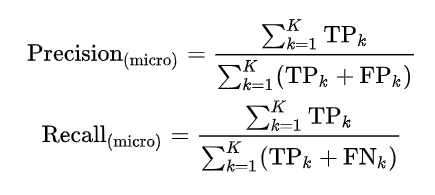

In [250]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [251]:
print(precision_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.9333333333333333
0.9333333333333333
0.9333333333333333


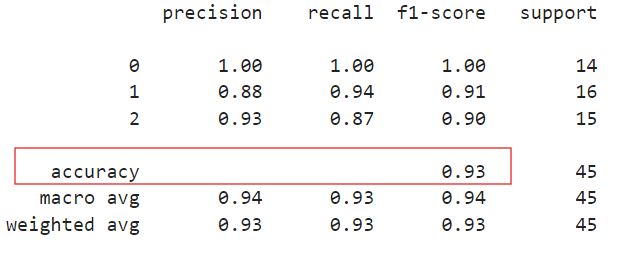

2) Макро-усреднение (macro-averaging) представляет собой среднее арифметическое подсчитанной метрики для каждого класса и используется __при дисбалансе классов, когда важен каждый класс__. В таком случае все классы учитываются равномерно независимо от их размера.

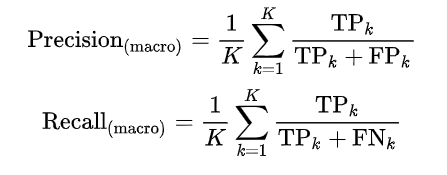

In [252]:
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.9369747899159663
0.9347222222222222
0.9352142110762801


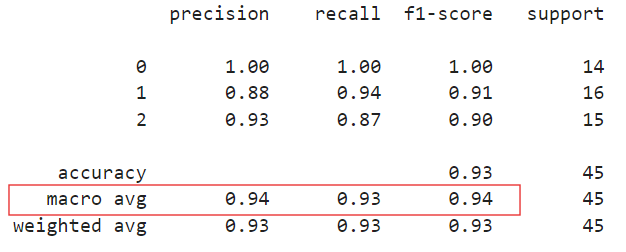

3) Взвешенное усреднение (weighted averaging) рассчитывается как взвешенное среднее и также применяется в случае __дисбаланса классов__, но только когда важность класса учитывается в зависимости от количества объектов с таким классом, то есть __когда важны наибольшие классы__. При таком подходе важность каждого класса учитывается с присвоением им весов. Вес класса w_k может устанавливаться по-разному, например, как доля примеров этого класса в обучающей выборке:

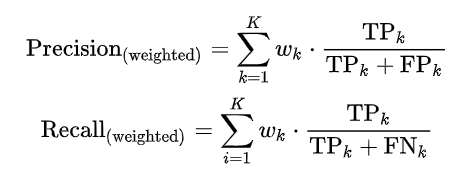

In [253]:
print(precision_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))

0.9343604108309991
0.9333333333333333
0.9331940090560781


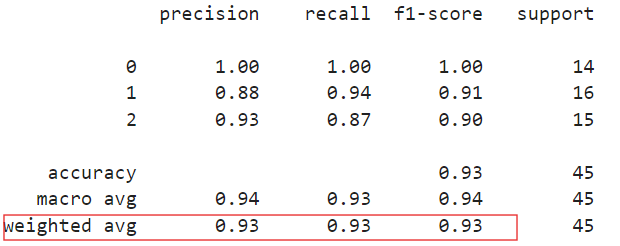

### Кроссвалидация

In [254]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] 
                                                    

In [255]:
y = iris_df['target']

In [256]:
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

In [257]:
# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', np.mean(cv_scores))

Cross-validation scores:  [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean cross-validation score:  0.96


### Настройка гиперпараметров

In [258]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1,2,3,4,5]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 3}


In [259]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [260]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.94      0.91        16
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45



In [262]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [263]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2,
       2])

In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



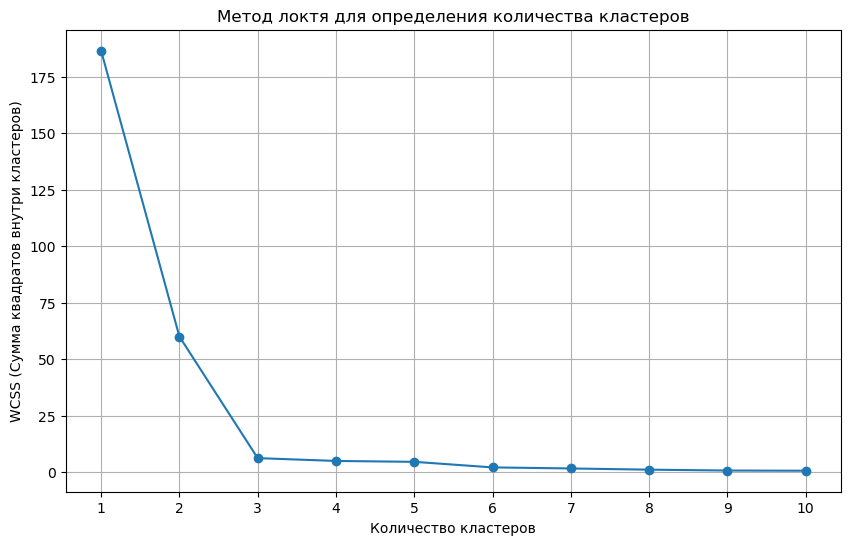

In [265]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Подготовка данных: выбираем только длину и ширину лепестков
X = iris_df.iloc[:, [3, 4]].values

# Инициализация списка для хранения значений WCSS
wcss = []

# Применение KMeans для разных значений k (от 1 до 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Построение графика методом локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для определения количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS (Сумма квадратов внутри кластеров)')
plt.xticks(range(1, 11))  # Устанавливаем метки по оси X
plt.grid()
plt.show()

In [266]:
num_clusters = 3

In [267]:
# Инициализация и обучение модели KMeans
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10, random_state=42)
pred = kmeans.fit_predict(X)  # Получение предсказанных меток кластеров
labels = kmeans.labels_  # Получение меток кластеровч

In [268]:
# Добавление меток кластеров в DataFrame
iris_df['cluster'] = pd.Series(labels)

In [269]:
# Вывод первых строк DataFrame с добавленным столбцом кластеров
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target    name  cluster  
0       0  setosa        1  
1       0  setosa        1  
2       0  setosa        1  
3       0  setosa        1  
4       0  setosa        1  


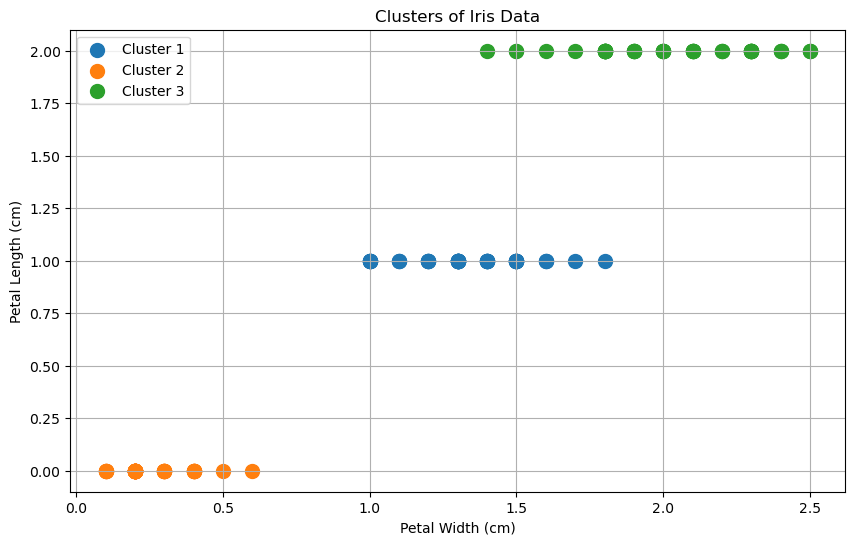

In [270]:
# Визуализация кластеров
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(X[pred == i, 0], X[pred == i, 1], s=100, label=f'Cluster {i + 1}')

# Настройка графика
plt.title('Clusters of Iris Data')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid()
plt.show()

In [271]:
# Вывод данных для каждого кластера
cluster_1 = iris_df[iris_df['cluster'] == 0]  # Кластер 1 (индекс 0)
cluster_2 = iris_df[iris_df['cluster'] == 1]  # Кластер 2 (индекс 1)
cluster_3 = iris_df[iris_df['cluster'] == 2]  # Кластер 3 (индекс 2)

# Печать первых нескольких строк для каждого кластера
print("Данные для Кластера 1:")
cluster_1.head()

Данные для Кластера 1:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
50,7.0,3.2,4.7,1.4,1,versicolor,0
51,6.4,3.2,4.5,1.5,1,versicolor,0
52,6.9,3.1,4.9,1.5,1,versicolor,0
53,5.5,2.3,4.0,1.3,1,versicolor,0
54,6.5,2.8,4.6,1.5,1,versicolor,0


In [272]:
print("\nДанные для Кластера 2:")
cluster_2.head()


Данные для Кластера 2:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [273]:
print("\nДанные для Кластера 3:")
cluster_3.head()


Данные для Кластера 3:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
100,6.3,3.3,6.0,2.5,2,virginica,2
101,5.8,2.7,5.1,1.9,2,virginica,2
102,7.1,3.0,5.9,2.1,2,virginica,2
103,6.3,2.9,5.6,1.8,2,virginica,2
104,6.5,3.0,5.8,2.2,2,virginica,2


In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler


Number of clusters = 2
Silhouette score = 0.7151553992691996

Number of clusters = 3
Silhouette score = 0.8296928442266419

Number of clusters = 4
Silhouette score = 0.7816054928516426

Number of clusters = 5
Silhouette score = 0.708214177699951

Number of clusters = 6
Silhouette score = 0.6980850349901268

Number of clusters = 7
Silhouette score = 0.7232424696350936

Number of clusters = 8
Silhouette score = 0.669866579819045

Number of clusters = 9
Silhouette score = 0.6931417487037355

Optimal number of clusters = 3


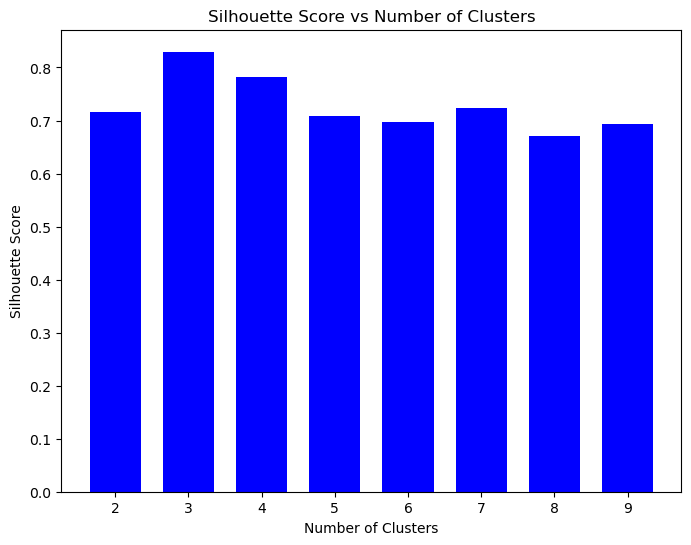

In [275]:
# Инициализация переменных
scores = []
values = np.arange(2, 10)  # Диапазон количества кластеров

# Итерация по заданному диапазону
for num_clusters in values:
    # Обучение модели KMeans
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    
    # Вычисление коэффициента силуэта
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    
    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
    
    scores.append(score)

# Построение графика коэффициентов силуэта
plt.figure(figsize=(8, 6))
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Извлечение лучшего значения и оптимального количества кластеров
optimal_num_clusters = values[np.argmax(scores)]
print('\nOptimal number of clusters =', optimal_num_clusters)

plt.show()


# Иерархическая кластеризация и дендрограмма

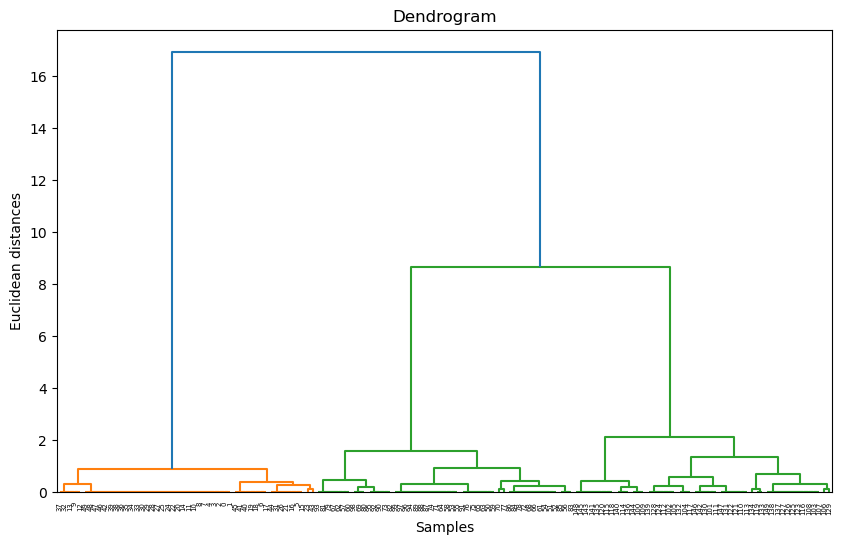

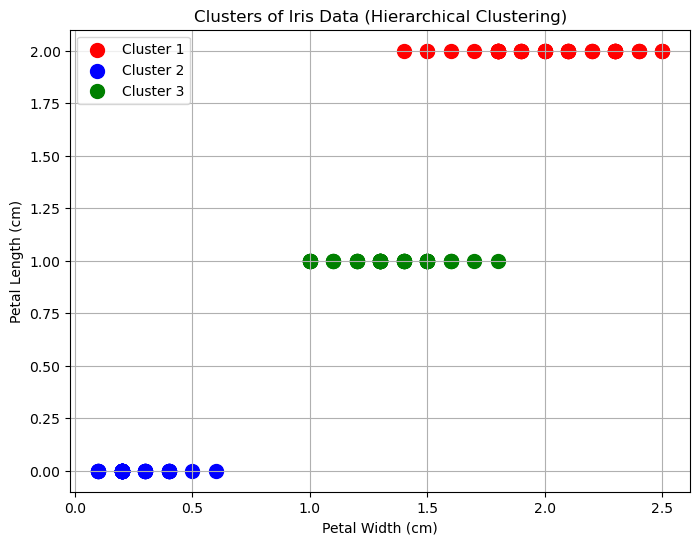

Коэффициент силуэта для иерархической кластеризации = 0.829692844226642
Индекс Калиньского-Харабаша для иерархической кластеризации = 2153.847903063379


In [276]:
# Построение дендрограммы
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Иерархическая кластеризация с 3 кластерами
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Визуализация результатов иерархической кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')

# Настройка графика
plt.title('Clusters of Iris Data (Hierarchical Clustering)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid()
plt.show()

# Вычисление метрик для иерархической кластеризации
silhouette_score_hc = metrics.silhouette_score(X, y_hc)
calinski_harabasz_score_hc = metrics.calinski_harabasz_score(X, y_hc)


print("Коэффициент силуэта для иерархической кластеризации =", silhouette_score_hc)
print("Индекс Калиньского-Харабаша для иерархической кластеризации =", calinski_harabasz_score_hc)

# DBSCAN для набора данных Iris

In [277]:
X = iris_df.iloc[:, [3, 4]].values  # Используем ширину и длину лепестков
# Нормализация данных
X = (X - X.mean(axis=0)) / X.std(axis=0)

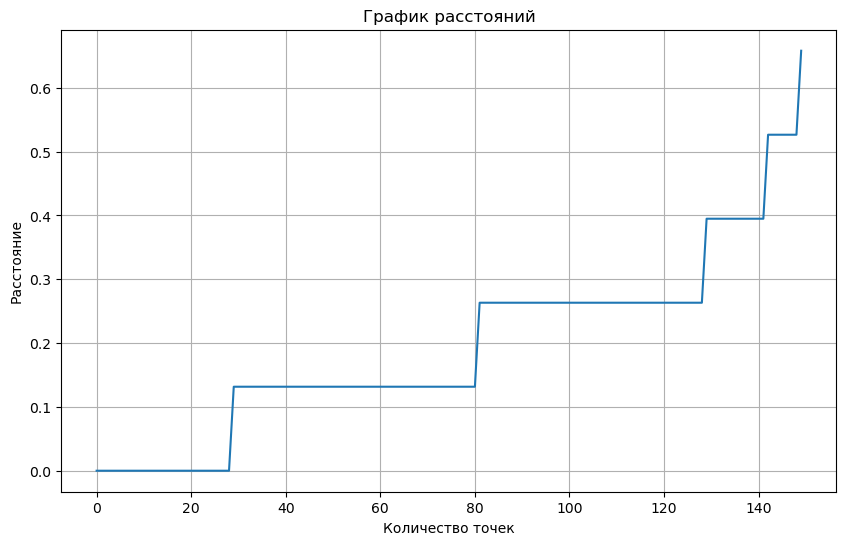

In [278]:
# Используем NearestNeighbors для определения расстояний до ближайших соседей
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='euclidean')
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

# Извлечение расстояний до 20-го ближайшего соседа
dist = dist[:, -1]
dist = np.sort(dist)

# Построение графика расстояний
plt.figure(figsize=(10, 6))
plt.plot(dist)
plt.title('График расстояний')
plt.xlabel('Количество точек')
plt.ylabel('Расстояние')
plt.grid()
plt.show()

Метки кластеров:
-1    121
 0     29
Name: count, dtype: int64


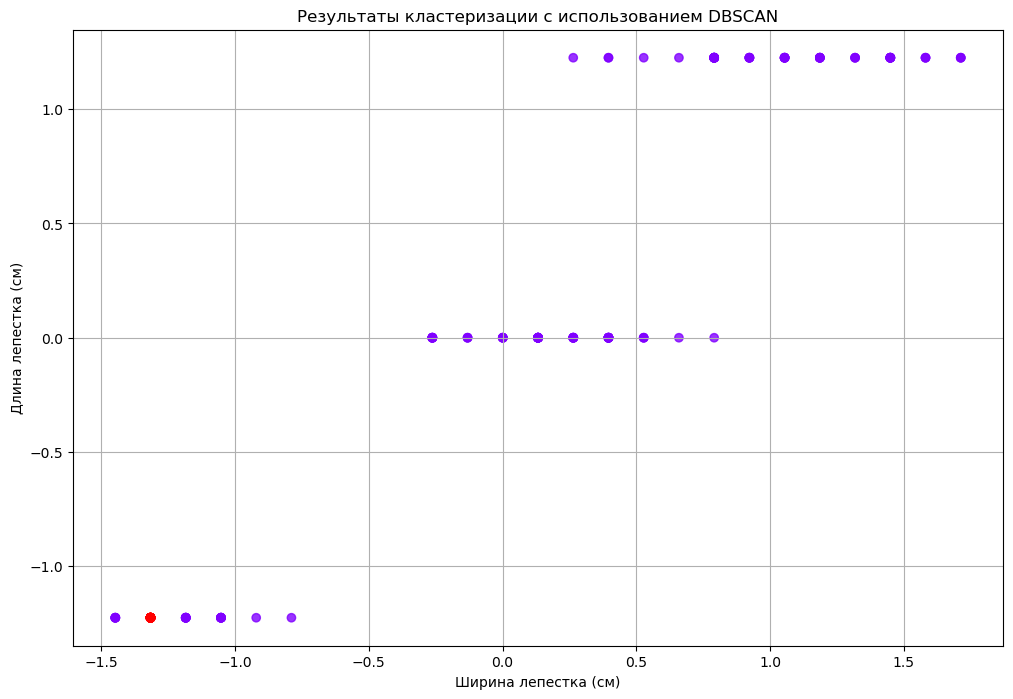

In [279]:
# Установка параметров eps и min_samples для DBSCAN
eps = 0.12  # Выбранное значение на основе графика
min_samples = 20

# Применение DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
labels = dbscan.fit_predict(X)

# Вывод меток кластеров
print("Метки кластеров:")
print(pd.Series(labels).value_counts())

# Визуализация результатов кластеризации
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.8)
plt.xlabel('Ширина лепестка (см)')
plt.ylabel('Длина лепестка (см)')
plt.title('Результаты кластеризации с использованием DBSCAN')
plt.grid()
plt.show()

In [280]:
# Вычисление метрик для оценки качества кластеризации
silhouette_score_dbscan = metrics.silhouette_score(X, labels)
calinski_harabasz_score_dbscan = metrics.calinski_harabasz_score(X, labels)

print("Коэффициент силуэта для DBSCAN =", silhouette_score_dbscan)
print("Индекс Калиньского-Харабаша для DBSCAN =", calinski_harabasz_score_dbscan)

Коэффициент силуэта для DBSCAN = 0.4051255460165137
Индекс Калиньского-Харабаша для DBSCAN = 93.48019284477138


# Spectral Clustering

In [281]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

In [286]:
# Используем все 4 признака для выполнения PCA
X = iris_df.iloc[:, [0, 1, 2, 3]].values  # Все признаки (длина и ширина чашелистиков и лепестков так же)

In [283]:
# Спектральная кластеризация с 3 кластерами
clustering_sp = SpectralClustering(n_clusters=3, random_state=42)
pred_sp = clustering_sp.fit_predict(X)

In [284]:
# Применение PCA для проекции на 3D пространство
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

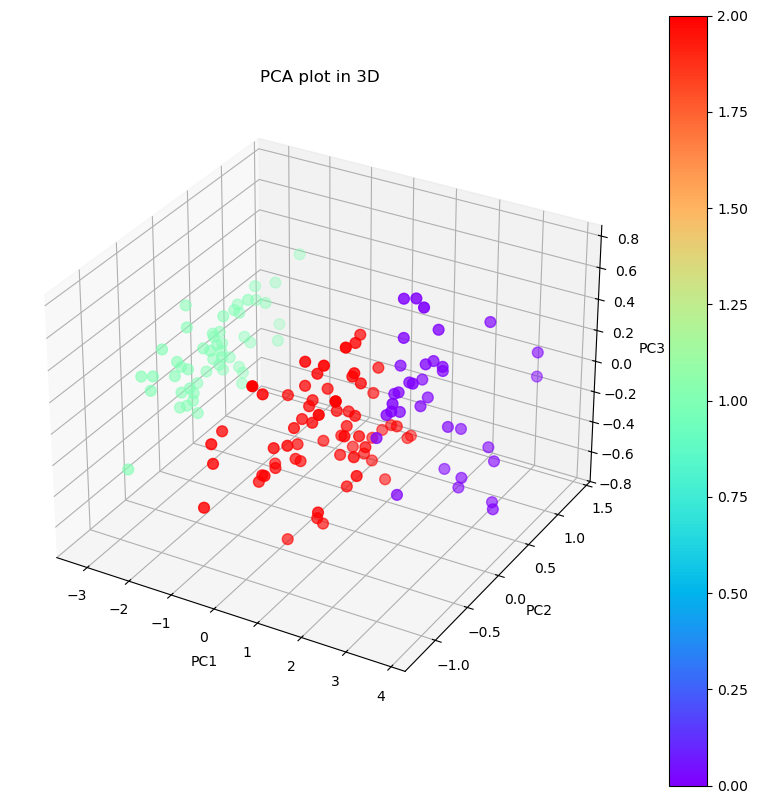

In [285]:
# Визуализация результатов в 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pred_sp, cmap='rainbow', s=60)

ax.set_title('PCA plot in 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter)
plt.show()

# Стандартизация признаков

In [288]:
#Используем все 4 признака для анализа
df = iris_df.iloc[:, [0, 1, 2, 3]].copy()  # Все признаки (длина и ширина чашелистиков и лепестков)

In [289]:
scaler = StandardScaler()
columns = df.columns
df[columns] = scaler.fit_transform(df[columns])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [291]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

# Построение дендрограммы для визуализации количества классов

<Figure size 3000x1500 with 0 Axes>

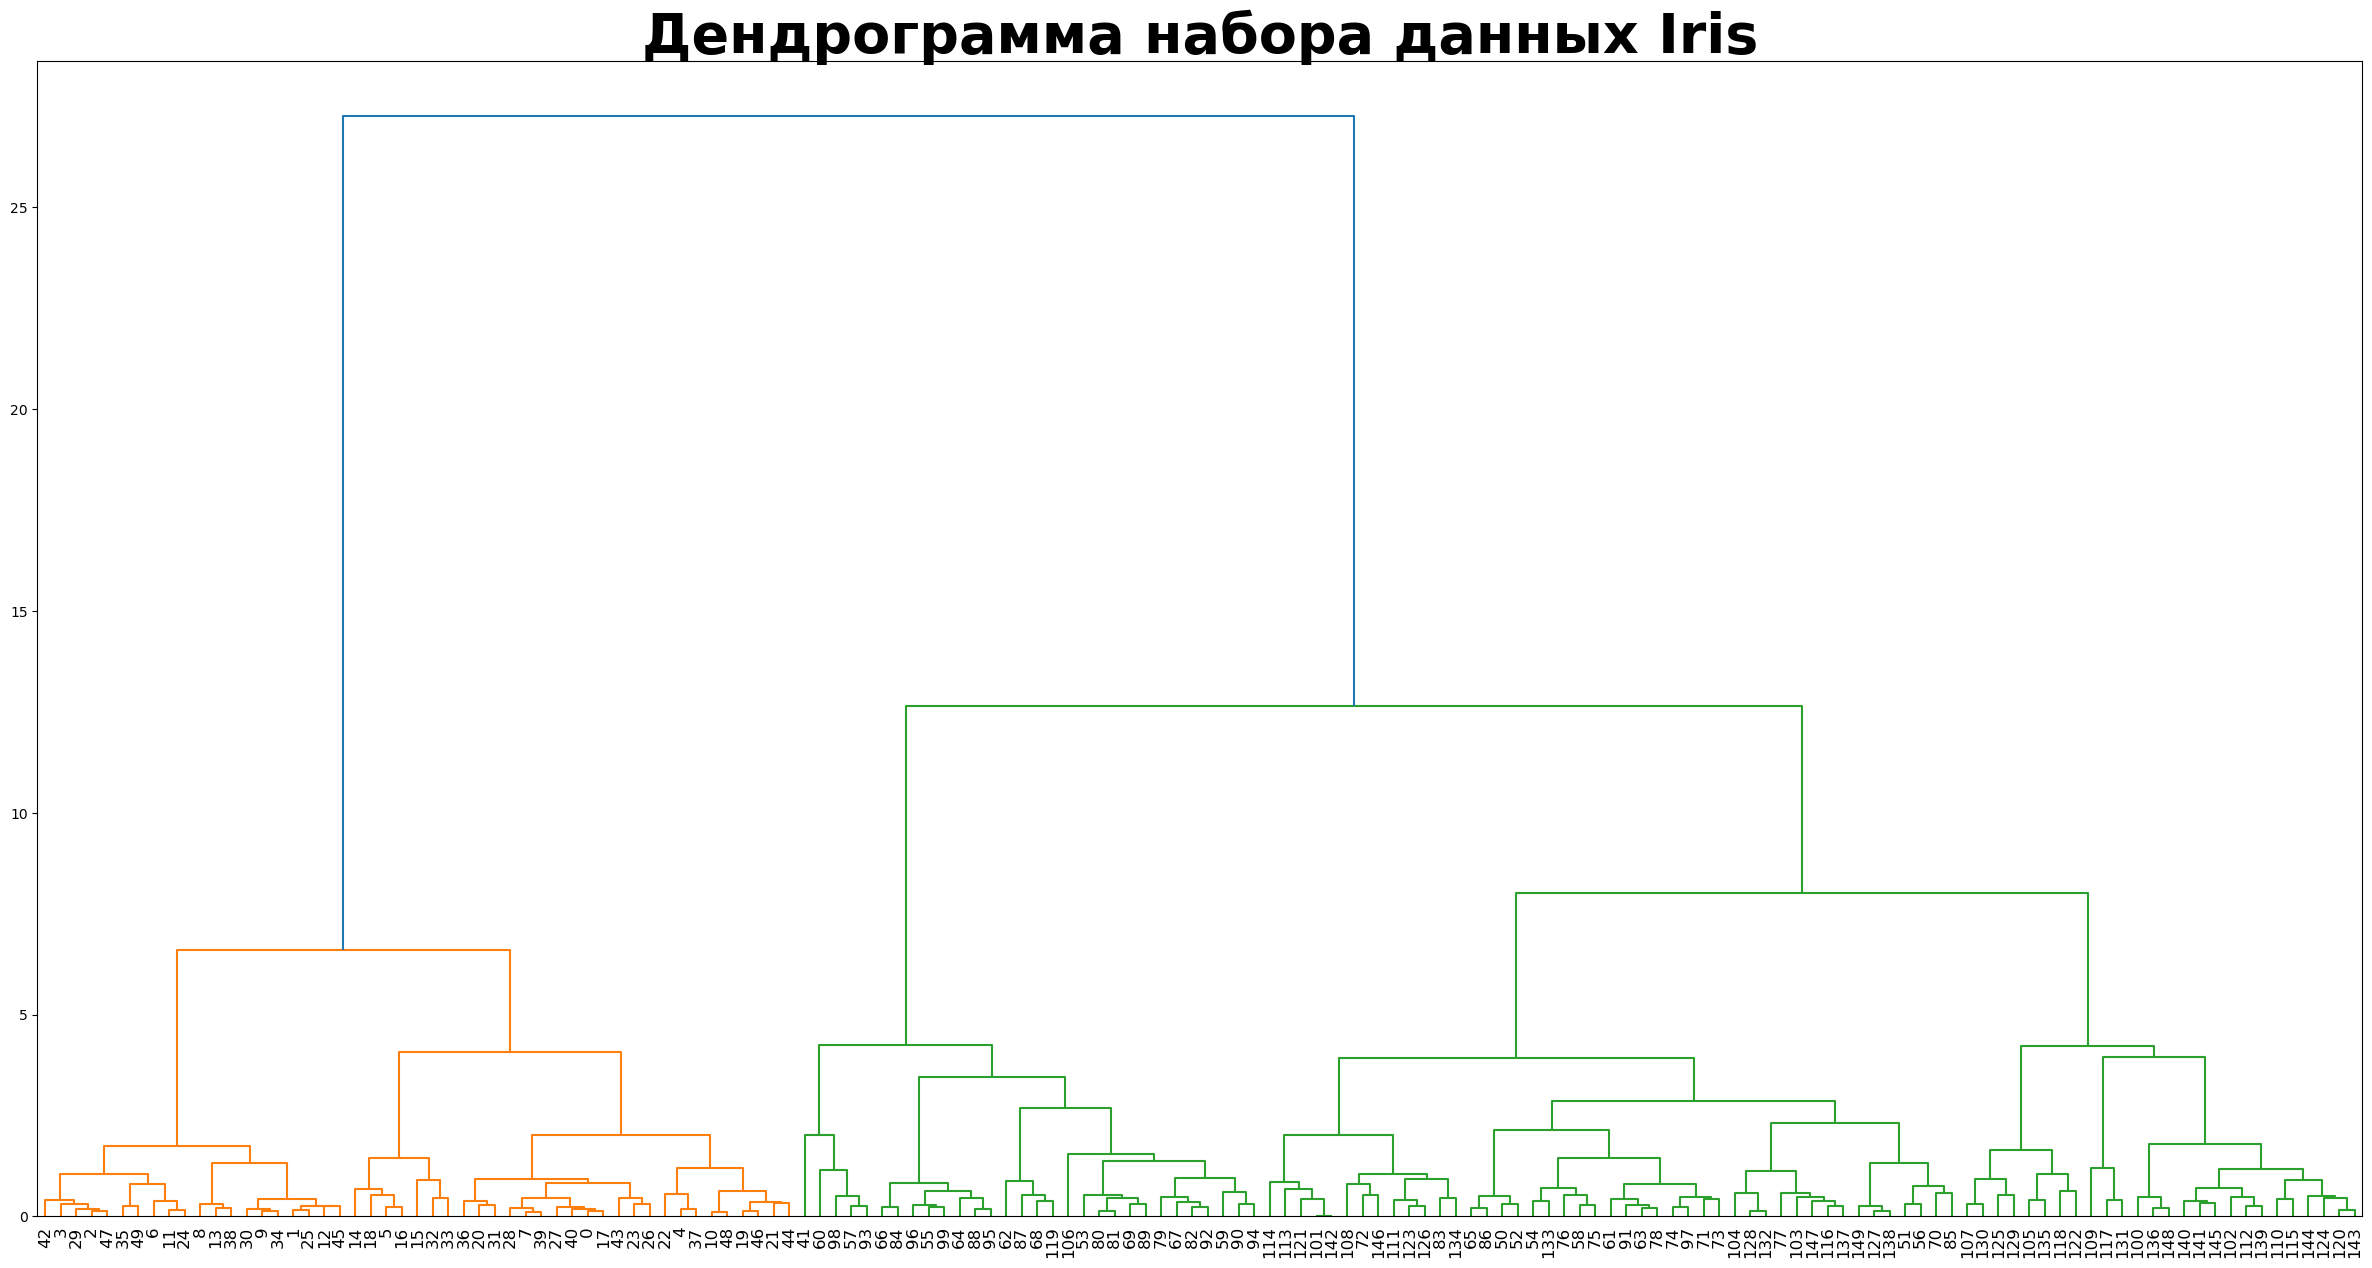

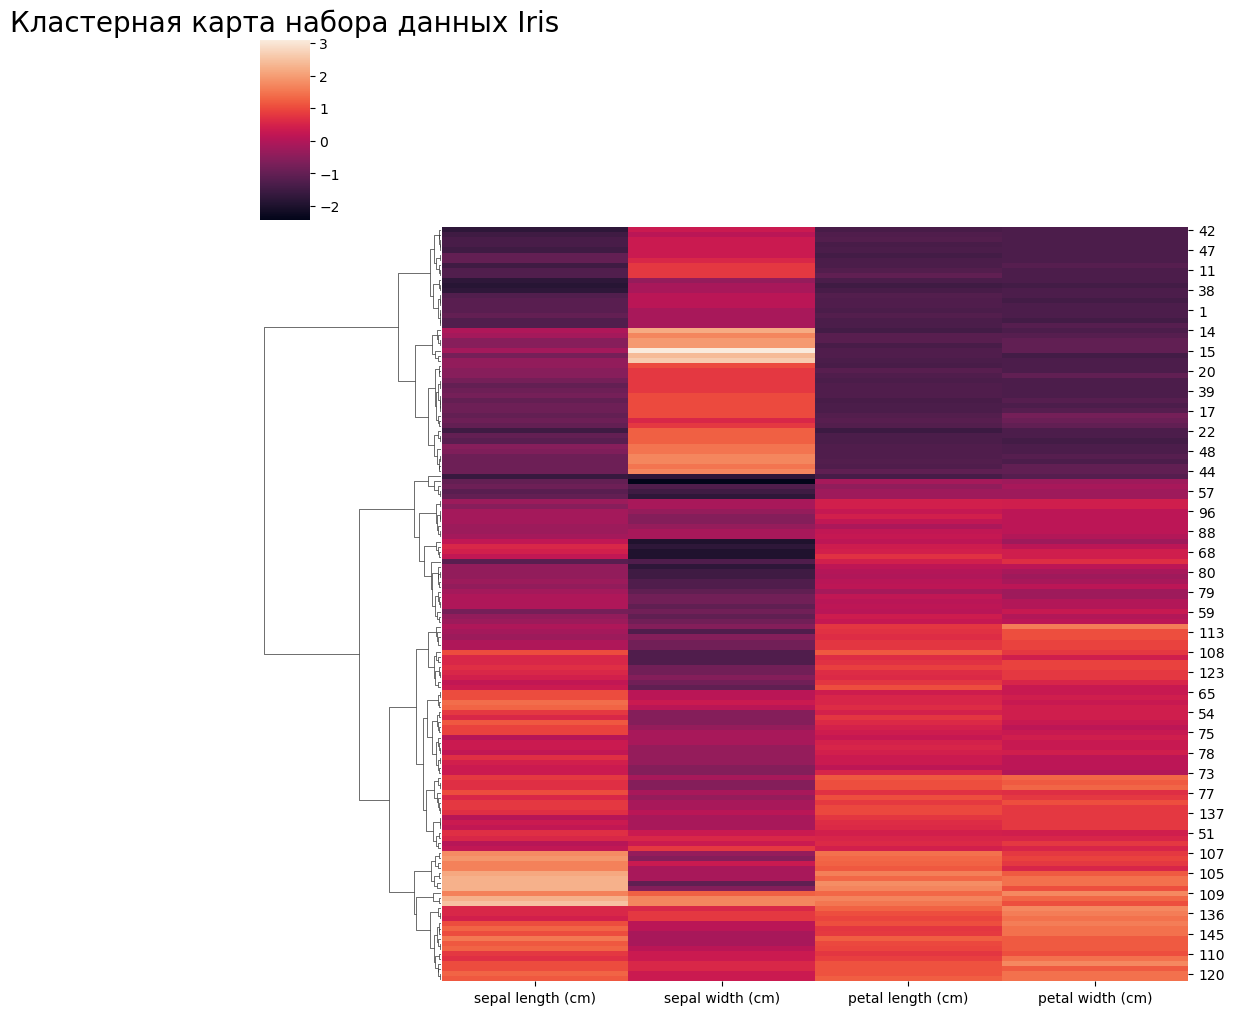

In [292]:
plt.figure(figsize=(30, 15))
shc.dendrogram(shc.linkage(df, method='ward'))
plt.xticks(fontsize=12)
plt.title("Дендрограмма набора данных Iris", fontweight='bold', fontsize=40)
plt.show()

# Построение кластерной карты (clustermap)
sns.clustermap(df, 
               col_cluster=False,
               method='ward',
               metric='euclidean')
plt.title("Кластерная карта набора данных Iris", fontsize=20)
plt.show()

In [293]:
# Построение модели агломеративной кластеризации с 3 кластерами
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_cluster.fit(df)

AgglomerativeClustering(n_clusters=3)

In [294]:
# Получение меток кластеров
labels = agg_cluster.labels_

In [298]:
# Вычисление метрик качества кластеризации
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)

In [299]:
# Вывод метрик
print('Силуэт:', round(silhouette, 3))
print('Критерий Калиньского-Харабаша:', round(chi, 3))

Силуэт: 0.447
Критерий Калиньского-Харабаша: 222.719


In [300]:
# Создание DataFrame с метками кластеров
data_labels = pd.DataFrame()
data_labels['Agglomerative'] = labels

In [302]:
# Вывод случайных 10 строк с метками
data_labels.sample(10)

,Agglomerative
13,1
140,0
42,1
95,2
98,2
27,1
104,0
14,1
2,1
125,0
